In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("./HW2_dataset/spam_train.csv")
test = pd.read_csv("./HW2_dataset/spam_test.csv")

In [3]:
X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values
X_test = test.iloc[:, 1:-1].values
y_test = test.iloc[:, -1].values

In [4]:
k_list = [1, 5, 11, 21, 41, 61, 81, 101, 201, 401]

In [21]:
def predict_single(X_train, y_train, k, x):
        # Calculate distances to all training examples
        
        distances = np.sqrt(np.sum((X_train - x)**2, axis=1))
        closest_indices = np.argsort(distances)[:k]
        
        closest_neighbours = [(distances[idx], y_train[idx]) for idx in closest_indices]

        k_labels = [label for _, label in closest_neighbours]
    
        # using summation to count the majority vote, spam or not
        prediction = 1 if sum(k_labels) > len(k_labels) / 2 else 0
        
        return prediction

In [22]:
def knnPredict(X_train, y_train, k, X_test):
    predictions = []
    for i in range(len(X_test)):
        pred = predict_single(X_train, y_train, k, X_test[i])
        predictions.append(pred)
    return np.array(predictions)

In [23]:
def evaluate_knn(X_train, y_train, X_test, y_test, k_vals):
    
    accuracy_results = {}
    prediction_results = {}
    
    for k in k_vals:
        print(f"Evaluating k={k}...")
        predictions = knnPredict(X_train, y_train, k, X_test)
        acc = np.sum(y_test == predictions) / len(y_test)
        accuracy_results[k] = acc
        # because we only need to print the first 50 predictions for each k
        prediction_results[k] = predictions[:50]
        print(f"k={k}: Test Accuracy = {acc:.6f} ({(acc*100):.2f}%)")
    
    return accuracy_results, prediction_results

### a) Reporting the test accuracies without normalization:

In [24]:
print("KNN Accuracy Without normalization")
unnormalized_acc_results, unnormalized_pred_results  = evaluate_knn(X_train, y_train, X_test, y_test, k_list)

KNN Accuracy Without normalization
Evaluating k=1...
k=1: Test Accuracy = 0.752716 (75.27%)
Evaluating k=5...
k=5: Test Accuracy = 0.754889 (75.49%)
Evaluating k=11...
k=11: Test Accuracy = 0.765319 (76.53%)
Evaluating k=21...
k=21: Test Accuracy = 0.746632 (74.66%)
Evaluating k=41...
k=41: Test Accuracy = 0.752282 (75.23%)
Evaluating k=61...
k=61: Test Accuracy = 0.737505 (73.75%)
Evaluating k=81...
k=81: Test Accuracy = 0.726641 (72.66%)
Evaluating k=101...
k=101: Test Accuracy = 0.728814 (72.88%)
Evaluating k=201...
k=201: Test Accuracy = 0.731421 (73.14%)
Evaluating k=401...
k=401: Test Accuracy = 0.719687 (71.97%)


In [25]:
def z_score_normalizer(X_train, X_test):
    
    # Calculate mean and std from training data
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    
    # Avoid division by zero
    std[std == 0] = 1
    
    # Normalize both train and test sets
    X_train_n = (X_train - mean) / std
    X_test_n = (X_test - mean) / std
    
    return X_train_n, X_test_n

### b) Reporting the test accuracies with normalization:

In [26]:
X_train_normalized, X_test_normalized = z_score_normalizer(X_train, X_test)
norm_acc_results, norm_pred_results = evaluate_knn(X_train_normalized, y_train, X_test_normalized, y_test, k_list)

Evaluating k=1...
k=1: Test Accuracy = 0.856584 (85.66%)
Evaluating k=5...
k=5: Test Accuracy = 0.870056 (87.01%)
Evaluating k=11...
k=11: Test Accuracy = 0.879183 (87.92%)
Evaluating k=21...
k=21: Test Accuracy = 0.884398 (88.44%)
Evaluating k=41...
k=41: Test Accuracy = 0.885267 (88.53%)
Evaluating k=61...
k=61: Test Accuracy = 0.882660 (88.27%)
Evaluating k=81...
k=81: Test Accuracy = 0.877445 (87.74%)
Evaluating k=101...
k=101: Test Accuracy = 0.875272 (87.53%)
Evaluating k=201...
k=201: Test Accuracy = 0.860061 (86.01%)
Evaluating k=401...
k=401: Test Accuracy = 0.839635 (83.96%)


In [27]:
def plot_results(results_no_norm, results_normalized):
    k_values = list(results_no_norm.keys())
    accuracies_no_norm = list(results_no_norm.values())
    accuracies_norm = list(results_normalized.values())
    
    plt.figure(figsize=(12, 6))
    plt.plot(k_values, accuracies_no_norm, marker='o', linewidth=2, markersize=8, label='Without Normalization')
    plt.plot(k_values, accuracies_norm, marker='s', linewidth=2, markersize=8, label='With Z-score Normalization')
    plt.xlabel('k (Number of Neighbors)', fontsize=12)
    plt.ylabel('Test Accuracy', fontsize=12)
    plt.title('KNN Performance vs k: Normalized vs Non-normalized', fontsize=14)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.xticks(k_values)
    plt.tight_layout()
    plt.show()

Plotting the graph...


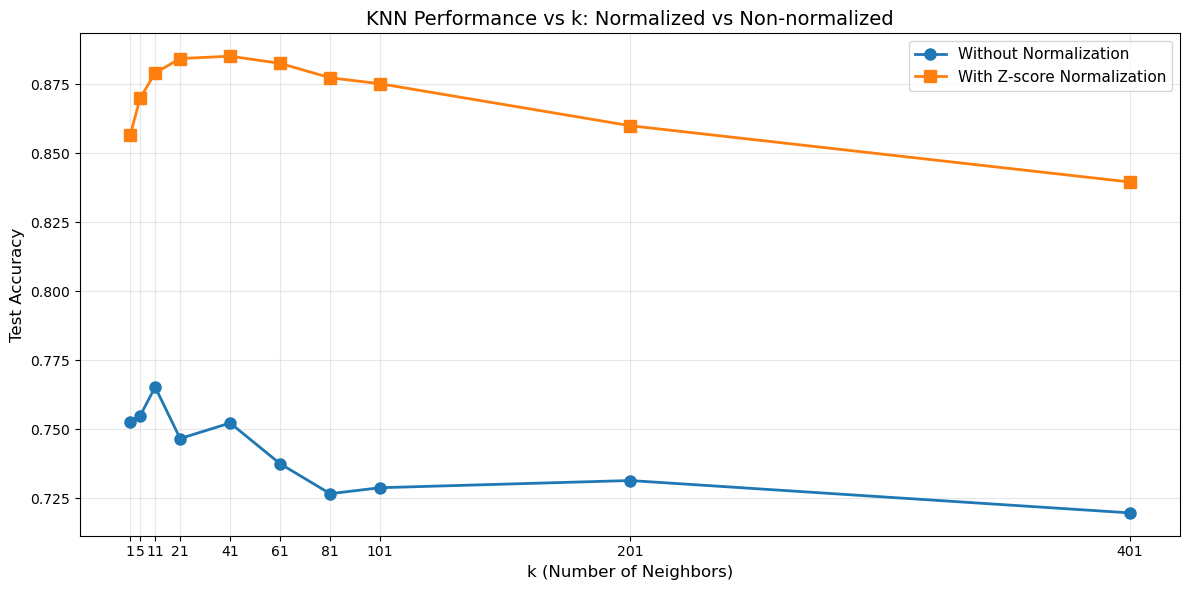

In [28]:
print("Plotting the graph...")
plot_results(unnormalized_acc_results, norm_acc_results)

### c) Generating an output displaying the prediction of the first 50 instances for each K value:

In [30]:
f = open("predictions_output.txt", "w")
for i in range(50):
    row_label = []
    for k in k_list:
        label = "no"
        if norm_pred_results[k][i] == 1:
            label = "spam"
        row_label.append(label)
    print(f"t{i+1} {", ".join(row_label)}")
    # Saving it in an output text file called predictions_output.txt
    print(f"t{i+1} {", ".join(row_label)}", file=f)


t1 spam, spam, spam, spam, spam, spam, spam, spam, no, no
t2 spam, spam, spam, spam, spam, spam, spam, spam, no, no
t3 spam, spam, spam, spam, spam, spam, spam, spam, spam, spam
t4 spam, spam, spam, spam, spam, spam, spam, spam, spam, spam
t5 spam, spam, spam, spam, spam, spam, spam, spam, spam, spam
t6 spam, spam, no, spam, no, no, no, no, spam, spam
t7 spam, no, no, no, no, no, no, no, no, no
t8 spam, spam, spam, spam, spam, spam, spam, spam, spam, spam
t9 spam, spam, spam, spam, spam, spam, spam, spam, spam, spam
t10 spam, spam, spam, spam, spam, spam, spam, spam, spam, spam
t11 spam, spam, spam, spam, spam, spam, spam, spam, spam, spam
t12 spam, spam, spam, spam, spam, spam, spam, spam, spam, spam
t13 spam, spam, spam, spam, spam, spam, spam, no, no, no
t14 spam, spam, spam, spam, spam, spam, spam, spam, no, no
t15 spam, spam, spam, spam, spam, spam, spam, spam, spam, spam
t16 spam, spam, spam, spam, spam, spam, spam, spam, spam, spam
t17 spam, spam, spam, spam, spam, spam, spam, s

### d) What can you conclude by comparing the KNN performance of a) and b)?

    The Z-score-normalized KNN performance in b) is supirior because of the improved accuracy. The KNN accuracy without normalization exhibits less accuracy due to the existence of large values in the features, which disproportionately influence the Euclidean distance calculation. However when the data is normalized, the feature values are rescaled, while representing their value differences in distance calculation. This results in a more accurate KNN model.

### e) Describe a method to select the optimal K for the KNN algorithm.

    Using Cross Validation can be one way to select the optimal K. We perform cross validation for each K by:
    - Splitting data into N folds
    - Train and validate our model N times using all the fold combinations and calculate the validation accuracy
    - Computing the average validation accuracy for our specific k value.
    - Repeat this process for different K values we want to test
    Finally, we select the K value with the highest average validation accuracy.
    We implement cross validation to reduce the risk of overfitting and ensure that the model generalizes well.